## Data Understanding

In [ ]:
import pandas as pd
stress_data = pd.read_csv('/content/stress.csv')
stress_data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [ ]:
stress_data.columns = ['Snoring Range','Respiration Rate','Body Temperature','Limb Movement Rate',
           'Blood Oxygen Levels','Eye Movement',
          'Number of Hours of Sleep', 'Heart Rate','Stress Levels']
stress_data.columns

Index(['Snoring Range', 'Respiration Rate', 'Body Temperature',
       'Limb Movement Rate', 'Blood Oxygen Levels', 'Eye Movement',
       'Number of Hours of Sleep', 'Heart Rate', 'Stress Levels'],
      dtype='object')

## Data Preprocessing


In [ ]:
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Snoring Range             630 non-null    float64
 1   Respiration Rate          630 non-null    float64
 2   Body Temperature          630 non-null    float64
 3   Limb Movement Rate        630 non-null    float64
 4   Blood Oxygen Levels       630 non-null    float64
 5   Eye Movement              630 non-null    float64
 6   Number of Hours of Sleep  630 non-null    float64
 7   Heart Rate                630 non-null    float64
 8   Stress Levels             630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [ ]:
stress_data['Stress Levels'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: Stress Levels, dtype: int64

In [ ]:
stress_data.describe()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Number of Hours of Sleep,Heart Rate,Stress Levels
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [ ]:
#feature X, label Y
X = stress_data.iloc[:, :-1]
Y = stress_data.iloc[:, -1]

In [ ]:
# X.shape
Y.shape

(630,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape

(504, 8)

In [ ]:
X_train

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Number of Hours of Sleep,Heart Rate
107,79.200,21.920,93.920,11.920,91.920,94.60,4.880,64.80
340,45.600,16.240,96.360,4.480,95.240,62.40,7.240,50.60
546,64.480,20.448,92.448,10.448,90.448,87.24,2.672,61.12
497,49.160,17.664,98.496,7.328,96.664,76.64,8.664,54.16
160,98.880,28.880,88.600,18.440,86.320,103.60,0.000,82.20
...,...,...,...,...,...,...,...,...
10,73.440,21.344,93.344,11.344,91.344,91.72,4.016,63.36
207,99.552,29.552,89.440,18.776,87.328,104.44,0.000,83.88
195,46.680,16.672,97.008,5.344,95.672,66.72,7.672,51.68
270,98.848,28.848,88.560,18.424,86.272,103.56,0.000,82.12


In [ ]:
X_test.shape

(126, 8)

In [ ]:
feature_names=['Snoring Range','Respiration Rate','Body Temperature','Limb Movement Rate','Blood Oxygen Levels','Eye Movement','Number of Hours of Sleep', 'Heart Rate']


### *Normalization*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn import preprocessing

scaler_MinMax = preprocessing.MinMaxScaler()
stress_data_minmax = scaler_MinMax.fit_transform(stress_data)
stress_data_minmax = pd.DataFrame(stress_data_minmax,columns = stress_data.columns)
stress_data_minmax.describe()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Number of Hours of Sleep,Heart Rate,Stress Levels
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.483636,0.414286,0.557143,0.513333,0.593333,0.633333,0.411111,0.414286,0.500000
std,0.352233,0.283294,0.252121,0.286642,0.260166,0.264305,0.339397,0.283294,0.353834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.178571,0.392857,0.300000,0.433333,0.472222,0.055556,0.178571,0.250000
50%,0.454545,0.357143,0.571429,0.466667,0.600000,0.666667,0.388889,0.357143,0.500000
75%,0.840909,0.642857,0.750000,0.783333,0.816667,0.861111,0.722222,0.642857,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Minmax X_Train, X_test
X_train_norm = scaler_MinMax.fit_transform(X_train)
X_test_norm = scaler_MinMax.fit_transform(X_test)

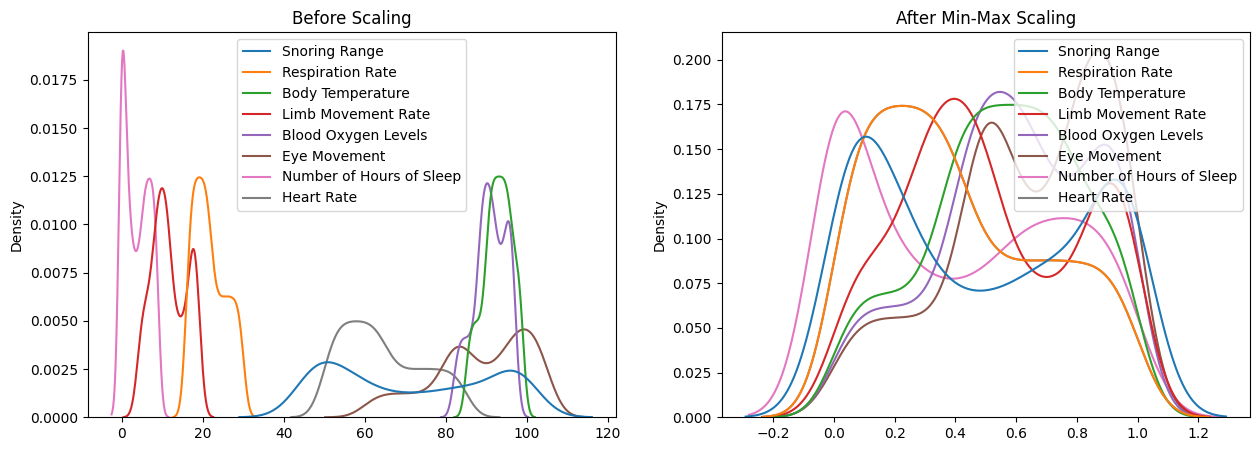

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(stress_data[feature_names], ax = ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(stress_data_minmax[feature_names], ax = ax2)
plt.show()


### *Standard Scaling*

In [ ]:
scaler_STD = preprocessing.StandardScaler()
stress_data_STD = scaler_STD.fit_transform(stress_data)
stress_data_STD = pd.DataFrame(stress_data_STD,columns = stress_data.columns)
stress_data_STD.describe()


,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Number of Hours of Sleep,Heart Rate,Stress Levels
count,6.300000e+02,6.300000e+02,6.300000e+02,6.300000e+02,6.300000e+02,6.300000e+02,6.300000e+02,6.300000e+02,6.300000e+02
mean,2.904202e-16,-1.832749e-16,8.007704e-16,1.719965e-16,-1.452101e-15,5.639228e-18,-5.216286e-17,4.229421e-18,-7.049035e-18
std,1.000795e+00,1.000795e+00,1.000795e+00,1.000795e+00,1.000795e+00,1.000795e+00,1.000795e+00,1.000795e+00,1.000795e+00
min,-1.374148e+00,-1.463552e+00,-2.211582e+00,-1.792275e+00,-2.282411e+00,-2.398121e+00,-1.212261e+00,-1.463552e+00,-1.414214e+00
25%,-9.867001e-01,-8.327105e-01,-6.521331e-01,-7.448416e-01,-6.154817e-01,-6.100484e-01,-1.048442e+00,-8.327105e-01,-7.071068e-01
50%,-8.265551e-02,-2.018692e-01,5.670723e-02,-1.629341e-01,2.564507e-02,1.262169e-01,-6.552765e-02,-2.018692e-01,0.000000e+00
75%,1.015113e+00,8.074769e-01,7.655476e-01,9.426902e-01,8.591099e-01,8.624822e-01,9.173871e-01,8.074769e-01,7.071068e-01
max,1.467135e+00,2.069159e+00,1.757924e+00,1.699170e+00,1.564349e+00,1.388386e+00,1.736483e+00,2.069159e+00,1.414214e+00


In [ ]:
#Standard Scaling X_Train, X_test
X_train_std = scaler_STD.fit_transform(X_train)
X_test_std = scaler_STD.fit_transform(X_test)

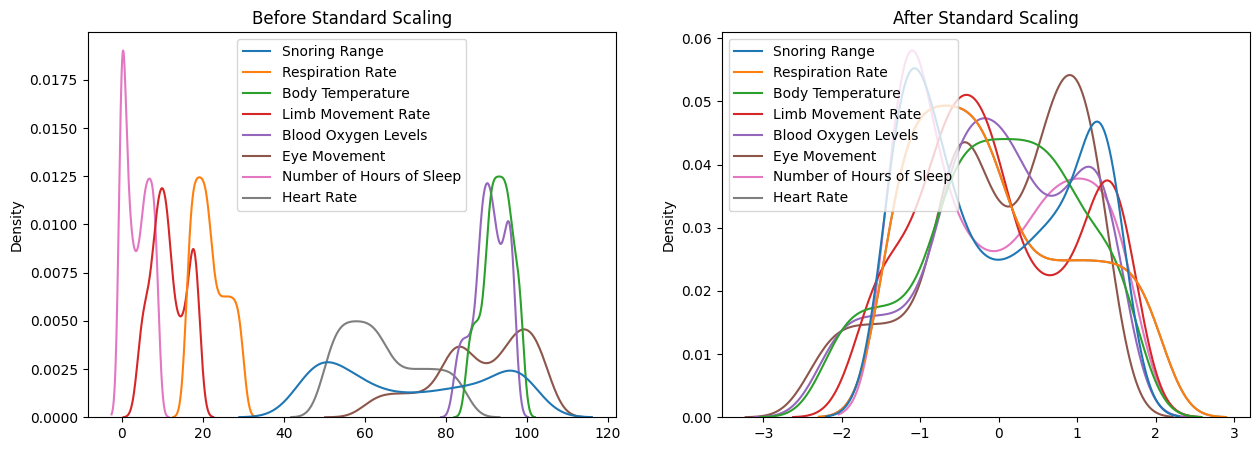

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(stress_data[feature_names], ax = ax1)
ax2.set_title('After Standard Scaling')
sns.kdeplot(stress_data_STD[feature_names], ax = ax2)
plt.show()


### *Robust Scaling*

In [ ]:
scaler_robust = preprocessing.RobustScaler()
stress_data_robust = scaler_robust.fit_transform(stress_data)
stress_data_robust = pd.DataFrame(stress_data_robust,columns = stress_data.columns)
stress_data_robust.describe()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Number of Hours of Sleep,Heart Rate,Stress Levels
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.041290,0.123077,-0.040000,0.096552,-0.017391,-0.085714,0.033333,0.123077,0.000000
std,0.499944,0.610171,0.705938,0.593052,0.678693,0.679643,0.509095,0.610171,0.707669
min,-0.645161,-0.769231,-1.600000,-0.965517,-1.565217,-1.714286,-0.583333,-0.769231,-1.000000
25%,-0.451613,-0.384615,-0.500000,-0.344828,-0.434783,-0.500000,-0.500000,-0.384615,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.548387,0.615385,0.500000,0.655172,0.565217,0.500000,0.500000,0.615385,0.500000
max,0.774194,1.384615,1.200000,1.103448,1.043478,0.857143,0.916667,1.384615,1.000000


In [ ]:
#Robust Scaling X_Train, X_test
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.fit_transform(X_test)

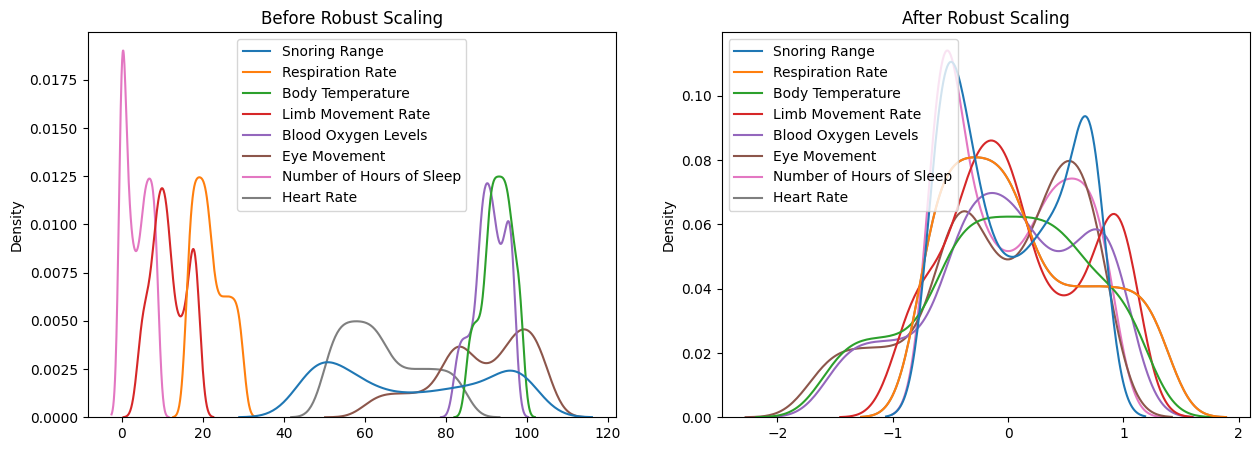

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before Robust Scaling')
sns.kdeplot(stress_data[feature_names], ax = ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(stress_data_robust[feature_names], ax = ax2)
plt.show()


## Modeling Naive Bayes


In [ ]:
#Model Training With Original Data.
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_predict_nb = naive.predict(X_test)
Y_predict_nb

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Normalized Data.
naive_norm = GaussianNB()
naive_norm.fit(X_train_norm, Y_train)

Y_predict_nb2 = naive_norm.predict(X_test_norm)
Y_predict_nb2

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Standardized Data.
naive_std = GaussianNB()
naive_std.fit(X_train_std, Y_train)

Y_predict_nb3 = naive_std.predict(X_test_std)
Y_predict_nb3

array([3, 0, 3, 3, 3, 1, 0, 0, 3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 2, 0, 3, 3, 0, 0, 1, 2,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 1, 3, 3, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 0, 3, 3, 1, 2, 1, 0,
       3, 3, 2, 3, 3, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 3])

In [ ]:
#Model Training With Robust Scaling Data
naive_robust = GaussianNB()
naive_robust.fit(X_train_robust, Y_train)

Y_predict_nb4 = naive_robust.predict(X_test_robust)
Y_predict_nb4

array([3, 0, 3, 3, 3, 1, 0, 0, 3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 2, 0, 3, 3, 0, 0, 1, 2,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 1, 3, 3, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 0, 3, 3, 1, 2, 1, 0,
       3, 3, 2, 3, 3, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 3])

### *Feature Importance Naive Bayes*

Feature ranking:
1. Snoring Range (0.330556)
2. Respiration Rate (0.062302)
3. Body Temperature (0.024206)
4. Limb Movement Rate (0.178968)
5. Blood Oxygen Levels (0.062302)
6. Eye Movement (0.161111)
7. Number of Hours of Sleep (0.213095)
8. Heart Rate (0.062302)


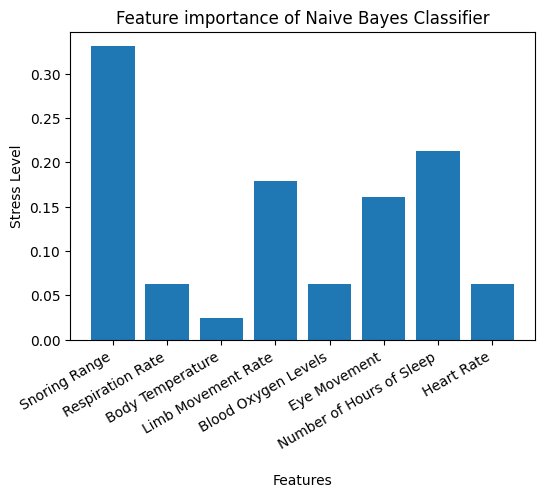

[0.33055556 0.06230159 0.02420635 0.17896825 0.06230159 0.16111111
 0.21309524 0.06230159]


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

imps = permutation_importance(naive, X_train, Y_train,scoring="neg_mean_squared_error")
importances = imps.importances_mean

print("Feature ranking:")
for f in range(X_test.shape[1]):
  print("%d. %s (%f)" % (f + 1, feature_names[f], importances[f]))
plt.figure(figsize=(6,4))
plt.title("Feature importance of Naive Bayes Classifier")
plt.xlabel('\nFeatures')
plt.ylabel("Stress Level")
plt.bar(feature_names, importances)
plt.xticks(rotation=30, ha='right')
plt.show()
print(importances)

## Evaluation Naive Bayes


In [ ]:
# Confusion Matrix With original data.

from sklearn.metrics import confusion_matrix

cm_NB = confusion_matrix(Y_test, Y_predict_nb)
print(cm_NB)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With original data.
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

nb_accuracy = accuracy_score(Y_test, Y_predict_nb)
nb_precision = precision_score(Y_test, Y_predict_nb,average = 'macro')
nb_recall = recall_score(Y_test, Y_predict_nb, average = 'macro')
nb_f1 = (2*nb_recall*nb_precision)/(nb_recall+nb_precision)

print('Accuracy Score',nb_accuracy*100,'%')
print('Precision Macro Score',nb_precision*100,'%')
print('Recall Score',nb_recall*100,'%')
print('F1 Score',nb_f1*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Normalized data.
cm_NB2 = confusion_matrix(Y_test, Y_predict_nb2)
print(cm_NB2)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Normalized data.

nb_accuracy2 = accuracy_score(Y_test, Y_predict_nb2)
nb_precision2 = precision_score(Y_test, Y_predict_nb2,average = 'macro')
nb_recall2 = recall_score(Y_test, Y_predict_nb2, average = 'macro')
nb_f1_2 = (2*nb_recall2*nb_precision2)/(nb_recall2+nb_precision2)

print('Accuracy Score',nb_accuracy2*100,'%')
print('Precision Macro Score',nb_precision2*100,'%')
print('Recall Score',nb_recall2*100,'%')
print('F1 Score',nb_f1_2*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Standardized data.
cm_NB3 = confusion_matrix(Y_test, Y_predict_nb3)
print(cm_NB3)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0 31  0]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Standardized data.

nb_accuracy3 = accuracy_score(Y_test, Y_predict_nb3)
nb_precision3 = precision_score(Y_test, Y_predict_nb3,average = 'macro')
nb_recall3 = recall_score(Y_test, Y_predict_nb3, average = 'macro')
nb_f1_3 = (2*nb_recall3*nb_precision3)/(nb_recall3+nb_precision3)

print('Accuracy Score',nb_accuracy3*100,'%')
print('Precision Macro Score',nb_precision3*100,'%')
print('Recall Score',nb_recall3*100,'%')
print('F1 Score',nb_f1_3*100,'%')

Accuracy Score 75.39682539682539 %
Precision Macro Score 68.92857142857143 %
Recall Score 80.0 %
F1 Score 74.05275779376498 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion Matrix With Robust Scaling data.
cm_NB4 = confusion_matrix(Y_test, Y_predict_nb4)
print(cm_NB4)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0 31  0]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Robust Scaling data.

nb_accuracy4 = accuracy_score(Y_test, Y_predict_nb4)
nb_precision4 = precision_score(Y_test, Y_predict_nb4,average = 'macro')
nb_recall4 = recall_score(Y_test, Y_predict_nb4, average = 'macro')
nb_f1_4 = (2*nb_recall4*nb_precision4)/(nb_recall4+nb_precision4)

print('Accuracy Score',nb_accuracy4*100,'%')
print('Precision Macro Score',nb_precision4*100,'%')
print('Recall Score',nb_recall4*100,'%')
print('F1 Score',nb_f1_4*100,'%')

Accuracy Score 75.39682539682539 %
Precision Macro Score 68.92857142857143 %
Recall Score 80.0 %
F1 Score 74.05275779376498 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classification Modeling

In [ ]:
#Model Training With Original Data.
from sklearn.ensemble import RandomForestClassifier

randomF = RandomForestClassifier(n_estimators=10)
randomF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
Y_pred_random = randomF.predict(X_test)
Y_pred_random

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Normalization Data.
randomF_norm = RandomForestClassifier()
randomF_norm.fit(X_train_norm, Y_train)

Y_pred_random2 = randomF_norm.predict(X_test_norm)
Y_pred_random2

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Standardized Data.
randomF_std = RandomForestClassifier()
randomF_std.fit(X_train_std, Y_train)

Y_pred_random3 = randomF_std.predict(X_test_std)
Y_pred_random3

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 3, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       3, 1, 3, 3, 3, 2, 2, 4, 1, 3, 2, 4, 3, 3, 4, 3, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 3, 0, 0, 1, 2,
       3, 3, 3, 4, 3, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 0, 0, 2, 3,
       2, 1, 0, 0, 4, 0, 2, 4, 4, 3, 2, 2, 0, 1, 0, 0, 3, 4, 1, 1, 1, 0,
       3, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 1, 1, 4])

In [ ]:
#Model Training With Robust Scaling Data
randomF_robust = GaussianNB()
randomF_robust.fit(X_train_robust, Y_train)

Y_pred_random4 = randomF_robust.predict(X_test_robust)
Y_pred_random4

array([0, 2, 0, 3, 3, 2, 2, 2, 0, 2, 3, 3, 0, 0, 3, 3, 0, 0, 2, 3, 2, 3,
       3, 0, 3, 3, 0, 0, 0, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 2, 0, 3, 2, 2, 2, 0,
       0, 0, 0, 3, 3, 2, 2, 3, 0, 0, 2, 2, 3, 3, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 3, 2, 0, 3, 3, 0, 0, 0, 2, 2, 2, 2, 0, 3, 2, 0, 2, 2,
       3, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 3])

### *Feature Importance Random Forest Classification*

Feature ranking:
1. Snoring Range (0.225219)
2. Respiration Rate (0.197731)
3. Body Temperature (0.197726)
4. Limb Movement Rate (0.127247)
5. Blood Oxygen Levels (0.100112)
6. Eye Movement (0.076502)
7. Number of Hours of Sleep (0.049465)
8. Heart Rate (0.025999)


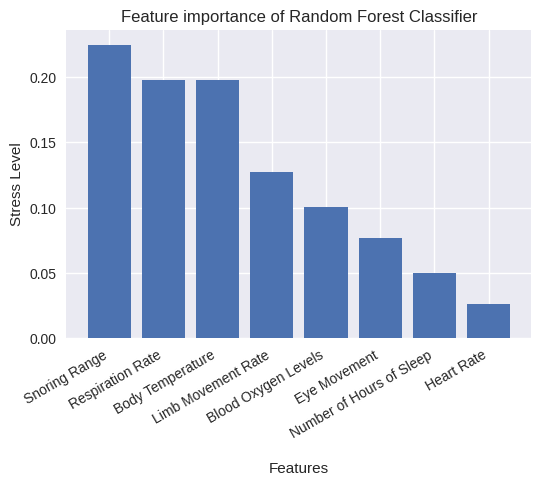

Heart Rate                  0.225219
Body Temperature            0.197731
Eye Movement                0.197726
Blood Oxygen Levels         0.127247
Respiration Rate            0.100112
Snoring Range               0.076502
Number of Hours of Sleep    0.049465
Limb Movement Rate          0.025999
dtype: float64


In [ ]:
random_feature_imp = pd.Series(randomF.feature_importances_, index = X_train.columns).sort_values(ascending=False)

print("Feature ranking:")
for f in range(X_test.shape[1]):
  print("%d. %s (%f)" % (f + 1, feature_names[f], random_feature_imp[f]))

plt.figure(figsize=(6,4))
plt.title("Feature importance of Random Forest Classifier")
plt.xlabel('\nFeatures')
plt.ylabel("Stress Level")
plt.bar(feature_names, random_feature_imp)
plt.xticks(rotation=30, ha='right')
plt.show()
print(random_feature_imp)

## Evaluation Random Forest Classification

In [ ]:
# Confusion Matrix With original data.
cm_random = confusion_matrix(Y_test, Y_pred_random)
print(cm_random)

[[4 6 5 8 4]
 [5 5 4 5 7]
 [3 4 6 5 4]
 [9 2 7 2 8]
 [5 4 1 5 8]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With original data.

rf_accuracy = accuracy_score(Y_test, Y_pred_random)
rf_precision = precision_score(Y_test, Y_pred_random,average = 'macro')
rf_recall = recall_score(Y_test, Y_pred_random, average = 'macro')
rf_f1 = (2*rf_recall*rf_precision)/(rf_recall+rf_precision)

print('Accuracy Score',rf_accuracy*100,'%')
print('Precision Macro Score',rf_precision*100,'%')
print('Recall Score',rf_recall*100,'%')
print('F1 Score',rf_f1*100,'%')

Accuracy Score 19.841269841269842 %
Precision Macro Score 19.81750946575631 %
Recall Score 20.648755431364123 %
F1 Score 20.22459484498974 %


In [ ]:
# Confusion Matrix With Normalized data.
cm_random2 = confusion_matrix(Y_test, Y_pred_random2)
print(cm_random2)

[[4 6 5 8 4]
 [5 5 4 5 7]
 [3 4 6 5 4]
 [9 2 7 2 8]
 [5 4 1 5 8]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Normalized data.

rf_accuracy2 = accuracy_score(Y_test, Y_pred_random2)
rf_precision2 = precision_score(Y_test, Y_pred_random2,average = 'macro')
rf_recall2 = recall_score(Y_test, Y_pred_random2, average = 'macro')
rf_f1_2 = (2*rf_recall2*rf_precision2)/(rf_recall2+rf_precision2)

print('Accuracy Score',rf_accuracy2*100,'%')
print('Precision Macro Score',rf_precision2*100,'%')
print('Recall Score',rf_recall2*100,'%')
print('F1 Score',rf_f1_2*100,'%')

Accuracy Score 19.841269841269842 %
Precision Macro Score 19.81750946575631 %
Recall Score 20.648755431364123 %
F1 Score 20.22459484498974 %


In [ ]:
# Confusion Matrix With Standardized data.
cm_random3 = confusion_matrix(Y_test, Y_pred_random3)
print(cm_random3)

[[5 6 4 9 3]
 [6 5 3 7 5]
 [4 3 6 7 2]
 [9 4 5 3 7]
 [5 4 1 8 5]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Standardized data.

rf_accuracy3 = accuracy_score(Y_test, Y_pred_random3)
rf_precision3 = precision_score(Y_test, Y_pred_random3,average = 'macro')
rf_recall3 = recall_score(Y_test, Y_pred_random3, average = 'macro')
rf_f1_3 = (2*rf_recall3*rf_precision3)/(rf_recall3+rf_precision3)

print('Accuracy Score',rf_accuracy3*100,'%')
print('Precision Macro Score',rf_precision3*100,'%')
print('Recall Score',rf_recall3*100,'%')
print('F1 Score',rf_f1_3*100,'%')

Accuracy Score 87.3015873015873 %
Precision Macro Score 89.00055319933617 %
Recall Score 87.8581446603887 %
F1 Score 88.42565926889112 %


In [ ]:
# Confusion Matrix With Robust Scaling data.
cm_random4 = confusion_matrix(Y_test, Y_pred_random4)
print(cm_random4)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0 31  0]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Robust Scaling data.
rf_accuracy4 = accuracy_score(Y_test, Y_pred_random4)
rf_precision4 = precision_score(Y_test, Y_pred_random4,average = 'macro')
rf_recall4 = recall_score(Y_test, Y_pred_random4, average = 'macro')
rf_f1_4 = (2*rf_recall4*rf_precision4)/(rf_recall4+rf_precision4)

print('Accuracy Score',rf_accuracy4*100,'%')
print('Precision Macro Score',rf_precision4*100,'%')
print('Recall Score',rf_recall4*100,'%')
print('F1 Score',rf_f1_4*100,'%')

Accuracy Score 75.39682539682539 %
Precision Macro Score 68.92857142857143 %
Recall Score 80.0 %
F1 Score 74.05275779376498 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression Modeling


In [ ]:
#Model Training With Original Data.
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred_logistic = logistic.predict(X_test)
Y_pred_logistic

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Normalized Data.
logistic_norm = LogisticRegression()
logistic_norm.fit(X_train_norm, Y_train)

Y_pred_logistic2 = logistic_norm.predict(X_test_norm)
Y_pred_logistic2

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Standardized Data.
logistic_std = LogisticRegression()
logistic_std.fit(X_train_std, Y_train)

Y_pred_logistic3 = logistic_std.predict(X_test_std)
Y_pred_logistic3

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Robust Scaling Data
logistic_robust = LogisticRegression()
logistic_robust.fit(X_train_robust, Y_train)

Y_pred_logistic4 = logistic_robust.predict(X_test_robust)
Y_pred_logistic4

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

### *Feature Importance Logistic Regression*

Feature ranking:
1. Snoring Range (-0.893051)
2. Respiration Rate (-0.208891)
3. Body Temperature (0.915090)
4. Limb Movement Rate (-0.235797)
5. Blood Oxygen Levels (0.907693)
6. Eye Movement (-0.933956)
7. Number of Hours of Sleep (0.869446)
8. Heart Rate (-0.541491)


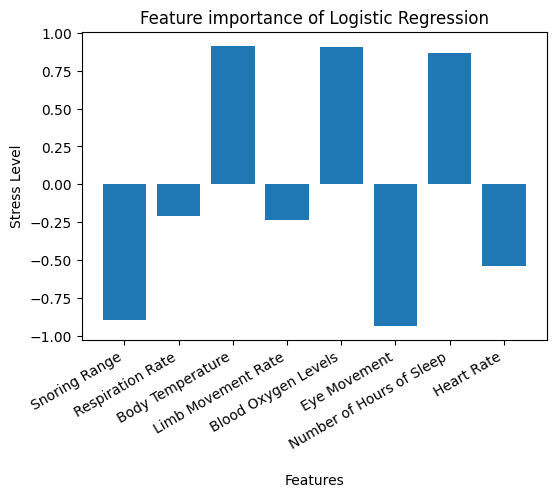

[-0.89305128 -0.20889115  0.9150897  -0.2357965   0.90769319 -0.93395557
  0.86944576 -0.54149107]


In [ ]:
logistic_feature_imp = logistic.coef_[0]

print("Feature ranking:")
for f in range(X_test.shape[1]):
  print("%d. %s (%f)" % (f + 1, feature_names[f], logistic_feature_imp[f]))

plt.figure(figsize=(6,4))
plt.title("Feature importance of Logistic Regression")
plt.xlabel('\nFeatures')
plt.ylabel("Stress Level")
plt.bar(feature_names, logistic_feature_imp)
plt.xticks(rotation=30, ha='right')
plt.show()
print(logistic_feature_imp)

## Evaluation Logistic Regression

In [ ]:
# Confusion Matrix With original data.
cm_lr = confusion_matrix(Y_test, Y_pred_logistic)
print(cm_lr)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With original data.

lr_accuracy = accuracy_score(Y_test, Y_pred_logistic)
lr_precision = precision_score(Y_test, Y_pred_logistic,average = 'macro')
lr_recall = recall_score(Y_test, Y_pred_logistic, average = 'macro')
lr_f1 = (2*lr_recall*lr_precision)/(lr_recall+lr_precision)

print('Accuracy Score',lr_accuracy*100,'%')
print('Precision Macro Score',lr_precision*100,'%')
print('Recall Score',lr_recall*100,'%')
print('F1 Score',lr_f1*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Normalized data.
cm_lr2 = confusion_matrix(Y_test, Y_pred_logistic2)
print(cm_lr2)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Normalized data.

lr_accuracy2 = accuracy_score(Y_test, Y_pred_logistic2)
lr_precision2 = precision_score(Y_test, Y_pred_logistic2,average = 'macro')
lr_recall2 = recall_score(Y_test, Y_pred_logistic2, average = 'macro')
lr_f1_2 = (2*lr_recall2*lr_precision2)/(lr_recall2+lr_precision2)

print('Accuracy Score',lr_accuracy2*100,'%')
print('Precision Macro Score',lr_precision2*100,'%')
print('Recall Score',lr_recall2*100,'%')
print('F1 Score',lr_f1_2*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Standardized data.
cm_lr3 = confusion_matrix(Y_test, Y_pred_logistic3)
print(cm_lr3)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Standardized data.

lr_accuracy3 = accuracy_score(Y_test, Y_pred_logistic3)
lr_precision3 = precision_score(Y_test, Y_pred_logistic3,average = 'macro')
lr_recall3 = recall_score(Y_test, Y_pred_logistic3, average = 'macro')
lr_f1_3 = (2*lr_recall3*lr_precision3)/(lr_recall3+lr_precision3)

print('Accuracy Score',lr_accuracy2*100,'%')
print('Precision Macro Score',lr_precision2*100,'%')
print('Recall Score',lr_recall3*100,'%')
print('F1 Score',lr_f1_3*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Robust Scaling data.
cm_lr4 = confusion_matrix(Y_test, Y_pred_logistic4)
print(cm_lr4)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Robust Scaling data.

lr_accuracy4 = accuracy_score(Y_test, Y_pred_logistic4)
lr_precision4 = precision_score(Y_test, Y_pred_logistic4,average = 'macro')
lr_recall4 = recall_score(Y_test, Y_pred_logistic4, average = 'macro')
lr_f1_4 = (2*lr_recall4*lr_precision4)/(lr_recall4+lr_precision4)

print('Accuracy Score',lr_accuracy4*100,'%')
print('Precision Macro Score',lr_precision4*100,'%')
print('Recall Score',lr_recall4*100,'%')
print('F1 Score',lr_f1_4*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


##Support Vector Machine Modeling

In [ ]:

#Model Training With Original Data.
from sklearn.svm import SVC

svm = SVC(kernel= 'linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
Y_pred_svm = svm.predict(X_test)
Y_pred_svm

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Normalized Data.
svm_norm = SVC(kernel= 'linear')
svm_norm.fit(X_train_norm, Y_train)

Y_pred_svm2 = svm_norm.predict(X_test_norm)
Y_pred_svm2

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Standardized Data.
svm_std = SVC(kernel= 'linear')
svm_std.fit(X_train_std, Y_train)

Y_pred_svm3 = svm_std.predict(X_test_std)
Y_pred_svm3

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Robust Scaling Data.
svm_robust = SVC(kernel= 'linear')
svm_robust.fit(X_train_robust, Y_train)

Y_pred_svm4 = svm_robust.predict(X_test_robust)
Y_pred_svm4

array([3, 0, 3, 3, 3, 1, 0, 0, 3, 0, 4, 3, 3, 2, 3, 3, 3, 2, 0, 3, 1, 3,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 3, 4, 3, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 3, 3, 2, 0, 1, 3, 3, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 0, 3, 3, 1, 2, 1, 0,
       4, 3, 2, 3, 3, 1, 1, 0, 1, 1, 3, 1, 0, 2, 2, 4])

### *Feature Importance Support Vector Machines*



Feature ranking:
1. Snoring Range (-0.061205)
2. Respiration Rate (-0.012508)
3. Body Temperature (0.154234)
4. Limb Movement Rate (-0.013043)
5. Blood Oxygen Levels (0.148514)
6. Eye Movement (-0.035279)
7. Number of Hours of Sleep (0.121099)
8. Heart Rate (-0.031271)


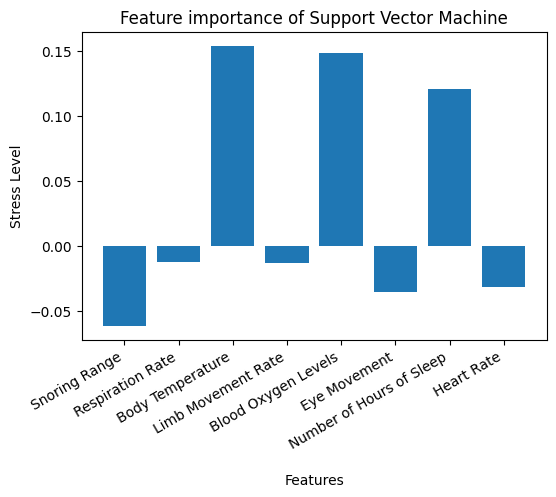

[-0.06120495 -0.0125082   0.15423376 -0.01304263  0.14851409 -0.03527873
  0.12109914 -0.03127051]


In [ ]:
svm_feature_imp = svm.coef_[0]

print("Feature ranking:")
for f in range(X_test.shape[1]):
  print("%d. %s (%f)" % (f + 1, feature_names[f], svm_feature_imp[f]))

plt.figure(figsize=(6,4))
plt.title("Feature importance of Support Vector Machine")
plt.xlabel('\nFeatures')
plt.ylabel("Stress Level")
plt.bar(feature_names, svm_feature_imp)
plt.xticks(rotation=30, ha='right')
plt.show()
print(svm_feature_imp)

## Evaluation Support Vector Machine

In [ ]:
# Confusion Matrix With original data.
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print(cm_svm)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With original data.

svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
svm_precision = precision_score(Y_test, Y_pred_svm,average = 'macro')
svm_recall = recall_score(Y_test, Y_pred_svm, average = 'macro')
svm_f1 = (2*svm_recall*svm_precision)/(svm_recall+svm_precision)

print('Accuracy Score',svm_accuracy*100,'%')
print('Precision Macro Score',svm_precision*100,'%')
print('Recall Score',svm_recall*100,'%')
print('F1 Score',svm_f1*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Normalized data.
cm_svm2 = confusion_matrix(Y_test, Y_pred_svm2)
print(cm_svm2)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Normalized data.

svm_accuracy2 = accuracy_score(Y_test, Y_pred_svm2)
svm_precision2 = precision_score(Y_test, Y_pred_svm2,average = 'macro')
svm_recall2 = recall_score(Y_test, Y_pred_svm2, average = 'macro')
svm_f1_2 = (2*svm_recall2*svm_precision2)/(svm_recall2+svm_precision2)

print('Accuracy Score',svm_accuracy2*100,'%')
print('Precision Macro Score',svm_precision2*100,'%')
print('Recall Score',svm_recall2*100,'%')
print('F1 Score',svm_f1_2*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Standardized data.
cm_svm3 = confusion_matrix(Y_test, Y_pred_svm3)
print(cm_svm3)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Standardized data.

svm_accuracy3 = accuracy_score(Y_test, Y_pred_svm3)
svm_precision3 = precision_score(Y_test, Y_pred_svm3,average = 'macro')
svm_recall3 = recall_score(Y_test, Y_pred_svm3, average = 'macro')
svm_f1_3 = (2*svm_recall3*svm_precision3)/(svm_recall3+svm_precision3)

print('Accuracy Score',svm_accuracy3*100,'%')
print('Precision Macro Score',svm_precision3*100,'%')
print('Recall Score',svm_recall3*100,'%')
print('F1 Score',svm_f1_3*100,'%')

Accuracy Score 100.0 %
Precision Macro Score 100.0 %
Recall Score 100.0 %
F1 Score 100.0 %


In [ ]:
# Confusion Matrix With Robust Scaling data.
cm_svm4 = confusion_matrix(Y_test, Y_pred_svm4)
print(cm_svm4)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0 18 13]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Robust Scaling data.

svm_accuracy4 = accuracy_score(Y_test, Y_pred_svm4)
svm_precision4 = precision_score(Y_test, Y_pred_svm4,average = 'macro')
svm_recall4 = recall_score(Y_test, Y_pred_svm4, average = 'macro')
svm_f1_4 = (2*svm_recall4*svm_precision4)/(svm_recall4+svm_precision4)

print('Accuracy Score',svm_accuracy4*100,'%')
print('Precision Macro Score',svm_precision4*100,'%')
print('Recall Score',svm_recall4*100,'%')
print('F1 Score',svm_f1_4*100,'%')

Accuracy Score 85.71428571428571 %
Precision Macro Score 91.62790697674419 %
Recall Score 88.38709677419354 %
F1 Score 89.97832972162027 %


### Decision Tree Classification Modeling

In [ ]:
#Model Training With Original Data.
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred_tree = decisionTree.predict(X_test)
Y_pred_tree

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 2, 0, 1, 1, 3, 1, 0, 2, 2, 4])

In [ ]:
#Model Training With Normalized Data.
decisionTree2 = DecisionTreeClassifier()
decisionTree2.fit(X_train_norm, Y_train)

Y_pred_tree2 = decisionTree2.predict(X_test_norm)
Y_pred_tree2

array([3, 0, 3, 4, 4, 1, 0, 0, 3, 0, 4, 4, 3, 2, 4, 4, 3, 2, 0, 4, 1, 4,
       4, 2, 4, 4, 3, 2, 2, 4, 1, 3, 2, 4, 4, 3, 4, 4, 4, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 4, 0, 0, 1, 2,
       3, 3, 3, 4, 4, 0, 0, 4, 3, 2, 0, 1, 4, 4, 2, 0, 0, 1, 1, 0, 2, 3,
       2, 1, 0, 0, 4, 1, 2, 4, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 1, 2, 1, 0,
       4, 3, 2, 3, 4, 1, 1, 0, 1, 1, 3, 1, 0, 2, 1, 4])

In [ ]:
#Model Training With Standardized Data.
decisionTree3 = DecisionTreeClassifier()
decisionTree3.fit(X_train_std, Y_train)

Y_pred_tree3 = decisionTree3.predict(X_test_std)
Y_pred_tree3

array([3, 0, 3, 4, 3, 1, 0, 0, 3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 0, 4, 1, 3,
       3, 1, 3, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 3, 2, 3, 3, 3, 1, 0, 4, 3, 2, 0, 3, 3, 0, 0, 1, 2,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 1, 3, 4, 2, 0, 0, 1, 0, 0, 2, 3,
       2, 1, 0, 0, 4, 0, 2, 3, 3, 3, 2, 2, 0, 1, 0, 0, 3, 4, 0, 1, 1, 0,
       3, 3, 2, 3, 3, 1, 1, 0, 1, 1, 3, 1, 0, 1, 1, 3])

In [ ]:
#Model Training With Robust Scaling Data.
decisionTree4 = DecisionTreeClassifier()
decisionTree4.fit(X_train_robust, Y_train)

Y_pred_tree4 = decisionTree4.predict(X_test_robust)
Y_pred_tree4

array([2, 0, 2, 3, 3, 1, 0, 0, 2, 0, 3, 3, 2, 2, 3, 3, 2, 2, 0, 3, 1, 3,
       3, 1, 3, 3, 3, 1, 1, 3, 1, 2, 1, 3, 3, 2, 3, 3, 3, 1, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 3, 2, 2, 0, 3, 3, 0, 0, 1, 2,
       3, 2, 2, 3, 3, 0, 0, 3, 2, 2, 0, 1, 3, 3, 2, 0, 0, 1, 0, 0, 2, 2,
       2, 1, 0, 0, 3, 1, 1, 3, 3, 2, 2, 2, 0, 1, 0, 0, 2, 3, 1, 1, 1, 0,
       3, 3, 2, 2, 3, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 3])

### *Feature Importance Decision Tree Classifier*

Feature ranking:
1. Snoring Range (0.241686)
2. Respiration Rate (0.000000)
3. Body Temperature (0.247630)
4. Limb Movement Rate (0.000000)
5. Blood Oxygen Levels (0.254136)
6. Eye Movement (0.251635)
7. Number of Hours of Sleep (0.000000)
8. Heart Rate (0.004913)


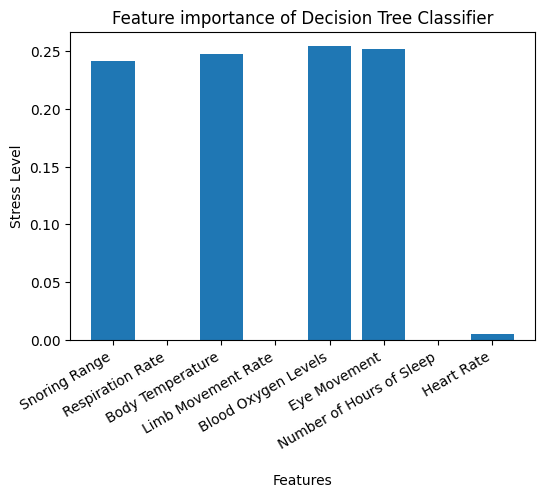

In [ ]:
tree_feature_imp = decisionTree.feature_importances_

print("Feature ranking:")
for f in range(X_test.shape[1]):
  print("%d. %s (%f)" % (f + 1, feature_names[f], tree_feature_imp[f]))
plt.figure(figsize=(6,4))
plt.title("Feature importance of Decision Tree Classifier")
plt.xlabel('\nFeatures')
plt.ylabel("Stress Level")
plt.bar(feature_names, tree_feature_imp)
plt.xticks(rotation=30, ha='right')
plt.show()
# print(tree_feature_imp)

## Evaluation Decision Tree Classifier

In [ ]:
# Confusion Matrix With original data.
cm_tree = confusion_matrix(Y_test, Y_pred_tree)
print(cm_tree)

[[26  0  0  0  0]
 [ 0 20  1  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With original data.

tree_accuracy = accuracy_score(Y_test, Y_pred_tree)
tree_precision = precision_score(Y_test, Y_pred_tree,average = 'macro')
tree_recall = recall_score(Y_test, Y_pred_tree, average = 'macro')
tree_f1 = (2*tree_recall*tree_precision)/(tree_recall+tree_precision)

print('Accuracy Score',tree_accuracy*100,'%')
print('Precision Macro Score',tree_precision*100,'%')
print('Recall Score',tree_recall*100,'%')
print('F1 Score',tree_f1*100,'%')

Accuracy Score 99.20634920634922 %
Precision Macro Score 99.16666666666669 %
Recall Score 99.04761904761905 %
F1 Score 99.10710710710713 %


In [ ]:
# Confusion Matrix With Normalized data.
cm_tree2 = confusion_matrix(Y_test, Y_pred_tree2)
print(cm_tree2)

[[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  1 22  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 31]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Normalized data.

tree_accuracy2 = accuracy_score(Y_test, Y_pred_tree2)
tree_precision2 = precision_score(Y_test, Y_pred_tree2,average = 'macro')
tree_recall2 = recall_score(Y_test, Y_pred_tree2, average = 'macro')
tree_f1_2 = (2*tree_recall2*tree_precision2)/(tree_recall2+tree_precision2)

print('Accuracy Score',tree_accuracy2*100,'%')
print('Precision Macro Score',tree_precision2*100,'%')
print('Recall Score',tree_recall2*100,'%')
print('F1 Score',tree_f1_2*100,'%')

Accuracy Score 99.20634920634922 %
Precision Macro Score 99.0909090909091 %
Recall Score 99.13043478260869 %
F1 Score 99.11066799601197 %


In [ ]:
# Confusion Matrix With Standardized data.
cm_tree3 = confusion_matrix(Y_test, Y_pred_tree3)
print(cm_tree3)

[[26  0  0  0  0]
 [ 4 17  0  0  0]
 [ 0  6 17  0  0]
 [ 0  0  1 24  0]
 [ 0  0  0 25  6]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Standardized data.

tree_accuracy3 = accuracy_score(Y_test, Y_pred_tree3)
tree_precision3 = precision_score(Y_test, Y_pred_tree3,average = 'macro')
tree_recall3 = recall_score(Y_test, Y_pred_tree3, average = 'macro')
tree_f1_3 = (2*tree_recall3*tree_precision3)/(tree_recall3+tree_precision3)

print('Accuracy Score',tree_accuracy3*100,'%')
print('Precision Macro Score',tree_precision3*100,'%')
print('Recall Score',tree_recall3*100,'%')
print('F1 Score',tree_f1_3*100,'%')

Accuracy Score 71.42857142857143 %
Precision Macro Score 80.80074928522134 %
Recall Score 74.04405262806384 %
F1 Score 77.27498577333405 %


In [ ]:
# Confusion Matrix With Robust Scaling data.
cm_tree4 = confusion_matrix(Y_test, Y_pred_tree4)
print(cm_tree4)

[[26  0  0  0  0]
 [ 2 19  0  0  0]
 [ 0  9 14  0  0]
 [ 0  0 21  4  0]
 [ 0  0  0 31  0]]


In [ ]:
# Accuracy Score, Precision Score, Recall Score and F1 Score With Robust Scaling data.

tree_accuracy4 = accuracy_score(Y_test, Y_pred_tree4)
tree_precision4 = precision_score(Y_test, Y_pred_tree4,average = 'macro')
tree_recall4 = recall_score(Y_test, Y_pred_tree4, average = 'macro')
tree_f1_4 = (2*tree_recall4*tree_precision4)/(tree_recall4+tree_precision4)

print('Accuracy Score',tree_accuracy4*100,'%')
print('Precision Macro Score',tree_precision4*100,'%')
print('Recall Score',tree_recall4*100,'%')
print('F1 Score',tree_f1_4*100,'%')

Accuracy Score 50.0 %
Precision Macro Score 42.42857142857142 %
Recall Score 53.469151138716356 %
F1 Score 47.31331751329765 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LIME Modeling

In [ ]:
#importing a library that is not in google colab
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a354b200d0844de67ce446d5366bb065421d2fe2c6bae5ea85523183b8d5360b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                      feature_names=feature_names,
                      class_names=naive.classes_,
                      discretize_continuous=False,
                      verbose=True
                      )

exp = explainer.explain_instance(X_test.iloc[1], naive.predict_proba)

Intercept 0.04580447593092002
Prediction_local [0.89207001]
Right: 7.800199820028141e-73


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
exp.show_in_notebook(show_table=True)
# exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp.as_list()

[('Body Temperature', 0.09897680787219085),
 ('Respiration Rate', -0.09404718851997873),
 ('Heart Rate', -0.09188436817565916),
 ('Limb Movement Rate', -0.09140831903699166),
 ('Blood Oxygen Levels', 0.08053426970378827),
 ('Snoring Range', -0.07757859615817285),
 ('Number of Hours of Sleep', 0.05898053183729811),
 ('Eye Movement', -0.03155396907934684)]

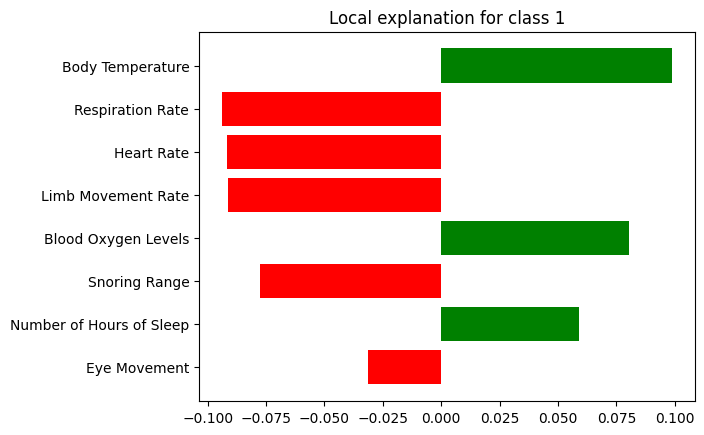

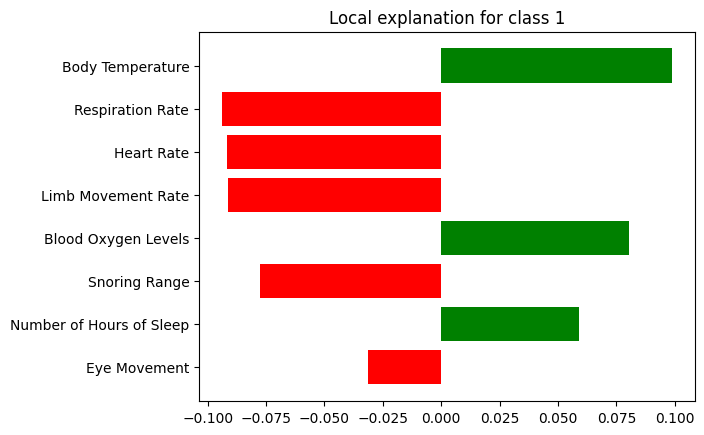

In [ ]:
exp.as_pyplot_figure()

### Save the model

In [ ]:
import pickle

In [ ]:
#save model with Naive Bays algorithm
file_name= 'naive.sav'
pickle.dump(naive,open(file_name,'wb'))

In [ ]:
#save model with Random Forest Classification algorithm
file_name= 'RandomForest.sav'
pickle.dump(randomF,open(file_name,'wb'))

In [ ]:
#save model with Support Vector Machine algorithm
file_name= 'SVM.sav'
pickle.dump(svm,open(file_name,'wb'))

In [ ]:
#save model with Logistic Regression algorithm
file_name= 'logistic.sav'
pickle.dump(logistic,open(file_name,'wb'))

In [ ]:
#save model with Decision Tree algorithm
file_name= 'DecisionTree.sav'
pickle.dump(decisionTree,open(file_name,'wb'))

##ROC Curve


In [ ]:
#ROC curve logistic regression

pred_prob1 = logistic.predict_proba(X_test)
pred_prob2 = naive.predict_proba(X_test)
pred_prob3 = randomF.predict_proba(X_test)
pred_prob4 = decisionTree.predict_proba(X_test)

# print(pred_prob1)
# print(pred_prob2)
# print(pred_prob3)

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

<ipython-input-106-788962637b77>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


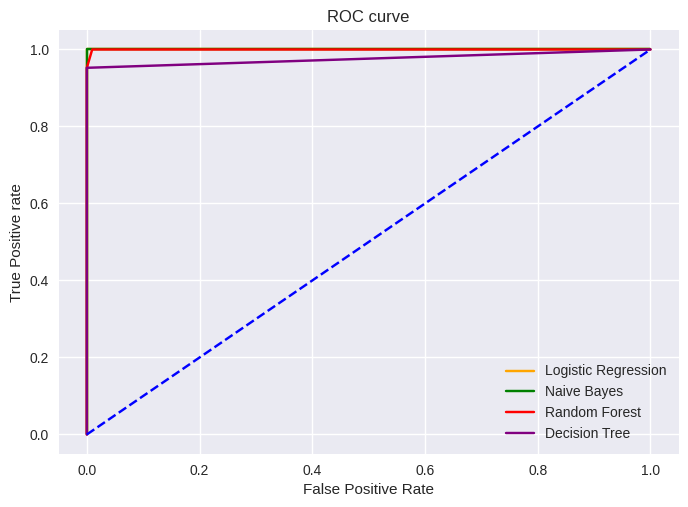

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, color='red', label='Random Forest')
plt.plot(fpr4, tpr4, color='purple', label='Decision Tree')
plt.plot(p_fpr, p_tpr,linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()